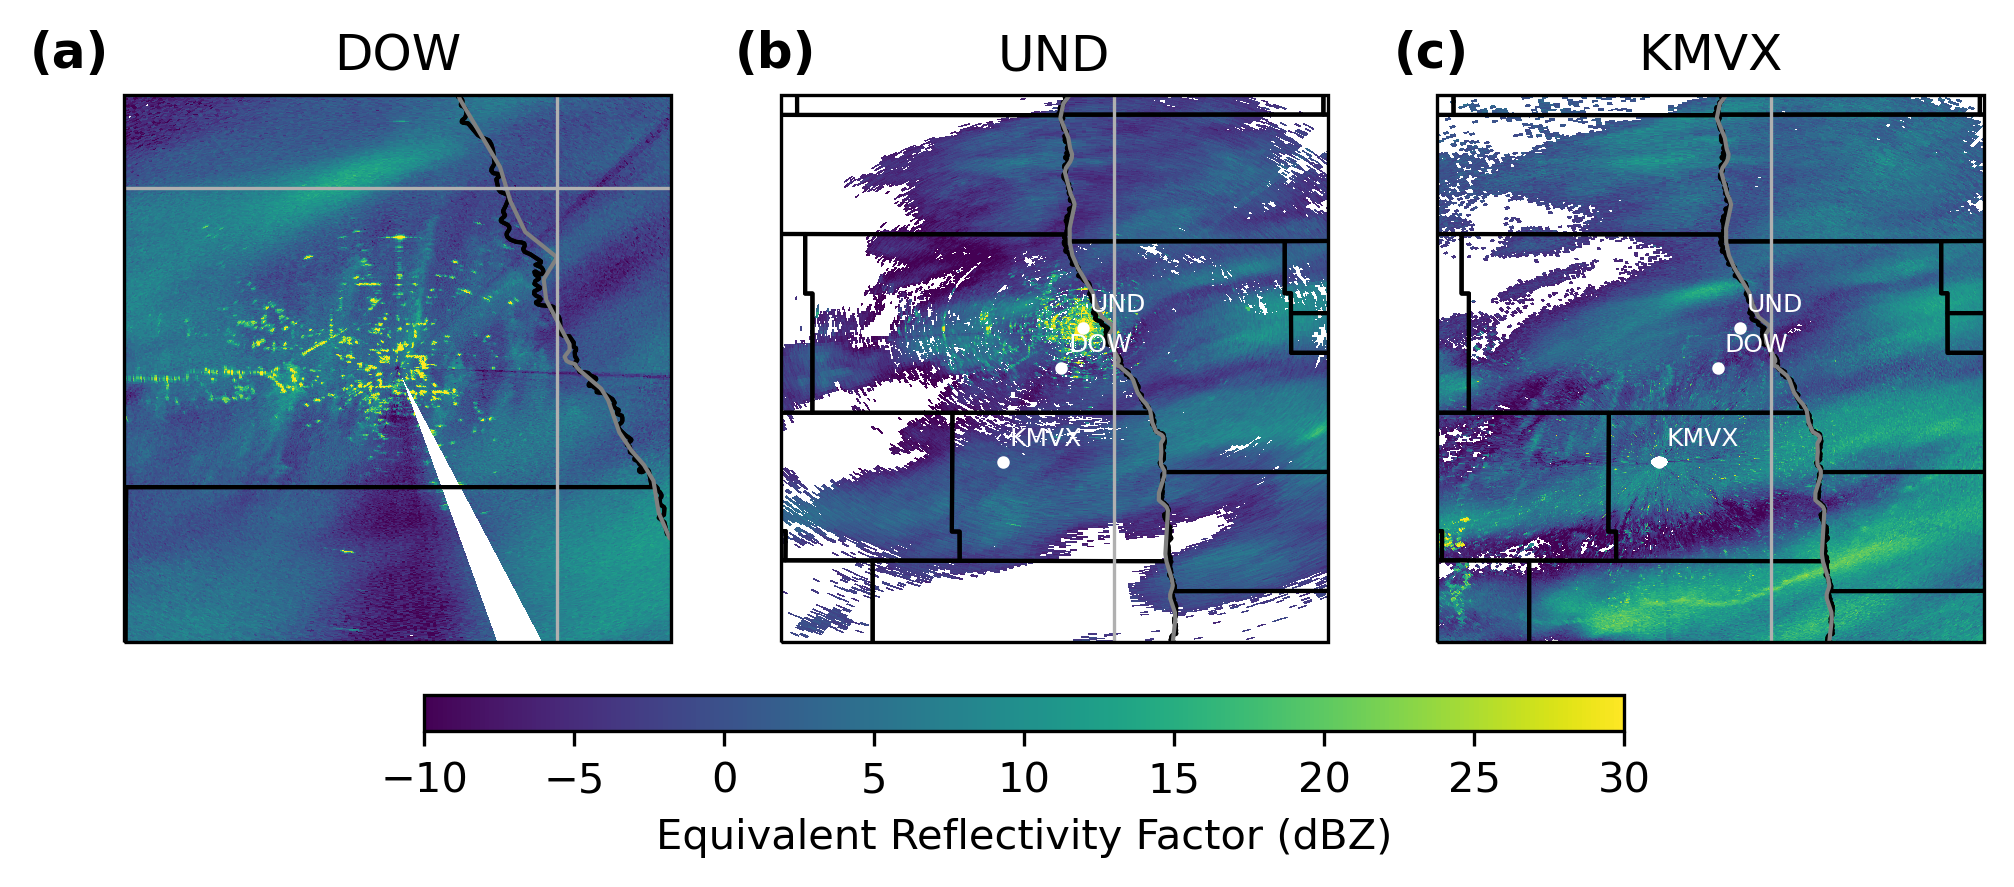

In [38]:
# Program to plot KMVX, UND radar, and DOW radar reflectivity, all at one time in a three-panel setup
# Last edit on 13 Feb 2021

import matplotlib.pyplot as plt
import pyart
import netCDF4
import os
import cartopy.crs as ccrs
import numpy as np
import metpy
import matplotlib.pyplot as plt
from metpy.plots import USCOUNTIES
import warnings
warnings.filterwarnings('ignore')
# Read in files

# DOW:
fname_DOW = 'data/cfrad.20200212_084054.128_to_20200212_084123.800_DOW7low_SUR.nc'

# UND:
fname_UND = 'data/UND200212084005.RAWM9SL'

# Mayville:
fname_MVX = 'data/KMVX20200212_084002_V06'

# Process DOW first:
radar_DOW = pyart.io.read_cfradial(fname_DOW)
radar_DOW.metadata['instrument_name'] = 'DOW7low'
radar_DOW.azimuth['data'] = (radar_DOW.azimuth['data'] - 180.) % 360. #Rotating image 180 deg to orient with north
display_DOW = pyart.graph.RadarMapDisplay(radar_DOW)

center_lon = radar_DOW.longitude['data'][0]
center_lat = radar_DOW.latitude['data'][0]

min_lat = center_lat - 0.8
max_lat = center_lat + 0.8
min_lon = center_lon - 0.8
max_lon = center_lon + 0.8


# Process UND second:
radar_UND = pyart.io.read(fname_UND)
display_UND = pyart.graph.RadarMapDisplay(radar_UND)

#Use gatefilter to mask out noise and ground clutter around radar
gatefilter = pyart.correct.GateFilter(radar_UND)
gatefilter.exclude_below('cross_correlation_ratio', 0.7, exclude_masked = True)


# Finally, process KMVX:
radar_MVX = pyart.io.read(fname_MVX)

center_lon_MVX = radar_MVX.longitude['data'][0]
center_lat_MVX = radar_MVX.latitude['data'][0]

display_MVX = pyart.graph.RadarMapDisplay(radar_MVX)



# Time to plot a 1x3 plot
projection = ccrs.PlateCarree()
fig = plt.figure(figsize = [8,4],dpi=300)

lons=[-98,-97.5,-97,-96.5,-96,-95.5-95]
lats=[46,46.5,47,47.5,48]
#DOW
ax1 = fig.add_subplot(131, projection = projection)
ax1.add_feature(USCOUNTIES.with_scale('5m'))
display_DOW.plot_ppi_map('DBZHC',
        0,
        vmin = -10,
        vmax = 30,
        min_lon = min_lon+.5,
        max_lon = max_lon-.5,
        min_lat = min_lat+.5,
        max_lat = max_lat-.5,
        resolution = '10m',
        projection = projection,
        colorbar_flag = 0,
        fig = fig,
        lat_0 = center_lat,
        lon_0 = center_lon,
        title = 'DOW',
        cmap = 'viridis',
        lat_lines=lats, 
        lon_lines=lons)
#display_DOW.plot_point(-97.1747, 47.8025)
ax1.text(-.1, 1.05,'(a)',horizontalalignment='center',fontsize=12,transform=ax1.transAxes,weight='bold')

#UND

ax2 = fig.add_subplot(132, projection = projection)
ax2.add_feature(USCOUNTIES.with_scale('5m'))
display_UND.plot_ppi_map('reflectivity',
        3, #Sweep number 0=0.5deg, 1=1.0deg, 2=1.5deg, 3=2.0deg, 4=2.75deg, 5=3.5deg, 6=4.25deg, 7=5.0deg, 8=6.0deg, 9=7.0deg
        vmin = -10,
        vmax = 30,
        min_lon = min_lon,
        max_lon = max_lon,
        min_lat = min_lat,
        max_lat = max_lat,
        resolution = '10m',
        projection = projection,
        colorbar_flag = 0,
        fig = fig,
        lat_0 = center_lat,
        lon_0 = center_lon,
        title = 'UND',
        cmap = 'viridis',
        gatefilter = gatefilter)
#display_UND.plot_point(-97.09, 47.92)
ax2.text(-.01, 1.05,'(b)',horizontalalignment='center',fontsize=12,transform=ax2.transAxes,weight='bold')
ax2.plot(-97.1547, 47.8025,color='white',transform=ccrs.PlateCarree(),marker='o',zorder=2,markersize=2)
ax2.text(-97.1347, 47.8525,'DOW',color='white',transform=ccrs.PlateCarree(),fontsize=6)
ax2.plot(-97.09, 47.92,color='white',transform=ccrs.PlateCarree(),marker='o',zorder=2,markersize=2)
ax2.text(-97.07, 47.97,'UND',color='white',transform=ccrs.PlateCarree(),fontsize=6)
ax2.plot(center_lon_MVX, center_lat_MVX,color='white',transform=ccrs.PlateCarree(),marker='o',zorder=2,markersize=2)
ax2.text(center_lon_MVX+.02, center_lat_MVX+.05,'KMVX',color='white',transform=ccrs.PlateCarree(),fontsize=6)
#KMVX
ax3 = fig.add_subplot(133, projection = projection)
ax3.add_feature(USCOUNTIES.with_scale('5m'))

display_MVX.plot_ppi_map('reflectivity',
        0,
        vmin = -10,
        vmax = 30,
        min_lon = min_lon,
        max_lon = max_lon,
        min_lat = min_lat,
        max_lat = max_lat,
        resolution = '10m',
        projection = projection,
        colorbar_flag = 0,
        fig = fig,
        lat_0 = center_lat,
        lon_0 = center_lon,
        title = 'KMVX',
        cmap = 'viridis')
#display_MVX.plot_point(center_lon_MVX, center_lat_MVX)
ax3.text(-.01, 1.05,'(c)',horizontalalignment='center',fontsize=12,transform=ax3.transAxes,weight='bold')
ax3.plot(-97.1547, 47.8025,color='white',transform=ccrs.PlateCarree(),marker='o',zorder=2,markersize=2)
ax3.text(-97.1347, 47.8525,'DOW',color='white',transform=ccrs.PlateCarree(),fontsize=6)
ax3.plot(-97.09, 47.92,color='white',transform=ccrs.PlateCarree(),marker='o',zorder=2,markersize=2)
ax3.text(-97.07, 47.97,'UND',color='white',transform=ccrs.PlateCarree(),fontsize=6)
ax3.plot(center_lon_MVX, center_lat_MVX,color='white',transform=ccrs.PlateCarree(),marker='o',zorder=2,markersize=2)
ax3.text(center_lon_MVX+.02, center_lat_MVX+.05,'KMVX',color='white',transform=ccrs.PlateCarree(),fontsize=6)
#Setup colorbar
colorbar_panel_axes = [0.25, 0.2, 0.5, 0.03]
cbax = fig.add_axes(colorbar_panel_axes)
display_MVX.plot_colorbar(cax=cbax,orient='horizontal', label='Equivalent Reflectivity Factor (dBZ)')
plt.tight_layout()

#plt.savefig('BAMS_3_panel_radar_0840UTC_v2_gatefiltered_lettered.png', dpi = 250)
plt.show()

